In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/COSC_757_Project/NYPD_Calls_Cleaned_Data.csv')

In [ ]:
pip install category-encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.5 MB/s eta 0:00:00


In [ ]:
# Extract hour as a primary feature
data['INCIDENT_HOUR'] = pd.to_numeric(data['INCIDENT_HOUR'], errors='coerce')

from category_encoders import BinaryEncoder

# Create a binary encoder instance
encoder = BinaryEncoder(cols=['NYPD_PCT_CD', 'BORO_NM', 'TYP_DESC', 'Cluster_Label'])

# Fit and transform to produce binary encoded dataframe
data_encoded = encoder.fit_transform(data)


In [ ]:
# Remove non-feature columns
X = data_encoded.drop(['CAD_EVNT_ID', 'CREATE_DATE', 'INCIDENT_DATE', 'INCIDENT_TIME', 'ADD_TS', 'DISP_TS', 'ARRIVD_TS', 'CLOSNG_TS', 'Cluster'], axis=1)
y = X.pop('INCIDENT_HOUR')

# Check processed features and target
X.head(), y.head()

(   NYPD_PCT_CD_0  NYPD_PCT_CD_1  NYPD_PCT_CD_2  NYPD_PCT_CD_3  NYPD_PCT_CD_4  \
 0              0              0              0              0              0   
 1              0              0              0              0              0   
 2              0              0              0              0              0   
 3              0              0              0              0              1   
 4              0              0              0              0              1   
 
    NYPD_PCT_CD_5  NYPD_PCT_CD_6  BORO_NM_0  BORO_NM_1  BORO_NM_2  ...  \
 0              0              1          0          0          1  ...   
 1              1              0          0          0          1  ...   
 2              1              1          0          1          0  ...   
 3              0              0          0          0          1  ...   
 4              0              1          0          1          0  ...   
 
    TYP_DESC_7  TYP_DESC_8  CIP_JOBS   Latitude  Longitude  Cluste

In [ ]:
# Import the necessary library for XGBoost and train-test split
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions and calculate mean squared error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Display model performance
mse, y_pred[:5], y_test[:5]


KeyboardInterrupt: 

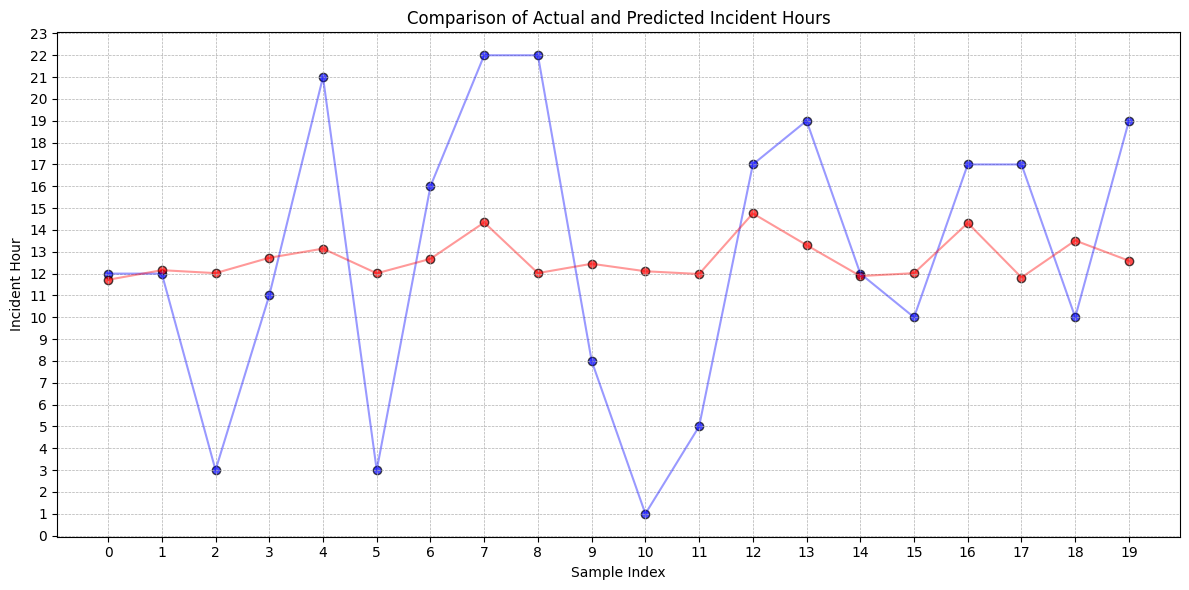

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'index', 'y_test', and 'y_pred' are defined and that y_test and y_pred contain hourly data
index = np.arange(20)

plt.figure(figsize=(12, 6))
plt.scatter(index, y_test[:20], color='blue', label='Actual Incident Hours', alpha=0.7, edgecolor='k')
plt.scatter(index, y_pred[:20], color='red', label='Predicted Incident Hours', alpha=0.7, edgecolor='k')

# Connecting points with lines
plt.plot(index, y_test[:20], color='blue', label='Actual Incident Hours Line', alpha=0.4)
plt.plot(index, y_pred[:20], color='red', label='Predicted Incident Hours Line', alpha=0.4)

plt.xlabel('Sample Index')
plt.ylabel('Incident Hour')
plt.title('Comparison of Actual and Predicted Incident Hours')
plt.xticks(index)  # Ensure all indices are shown
plt.yticks(np.arange(0, 24))  # Set y-ticks to display each hour of the day
# plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
X.head()

,NYPD_PCT_CD_0,NYPD_PCT_CD_1,NYPD_PCT_CD_2,NYPD_PCT_CD_3,NYPD_PCT_CD_4,NYPD_PCT_CD_5,NYPD_PCT_CD_6,BORO_NM_0,BORO_NM_1,BORO_NM_2,...,TYP_DESC_7,TYP_DESC_8,CIP_JOBS,Latitude,Longitude,Cluster_Label_0,Cluster_Label_1,Cluster_Label_2,Cluster_Label_3,RESPONSE_TS
0,0,0,0,0,0,0,1,0,0,1,...,0,1,1,40.649730,-73.936475,0,0,0,1,0.000098
1,0,0,0,0,0,1,0,0,0,1,...,1,0,1,40.662817,-73.881221,0,0,1,0,0.000402
2,0,0,0,0,0,1,1,0,1,0,...,1,1,1,40.762587,-73.912199,0,0,1,0,0.000299
3,0,0,0,0,1,0,0,0,0,1,...,1,1,1,40.610729,-73.967644,0,0,1,0,0.004174
4,0,0,0,0,1,0,1,0,1,0,...,1,0,1,40.748119,-73.891679,0,0,1,0,0.001259
